## importing Python Libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ses
import missingno as ms
%matplotlib inline

## Reading data

In [101]:
data = pd.read_csv('ratings_Beauty.csv')

In [68]:
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
UserId       object
ProductId    object
Rating       float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


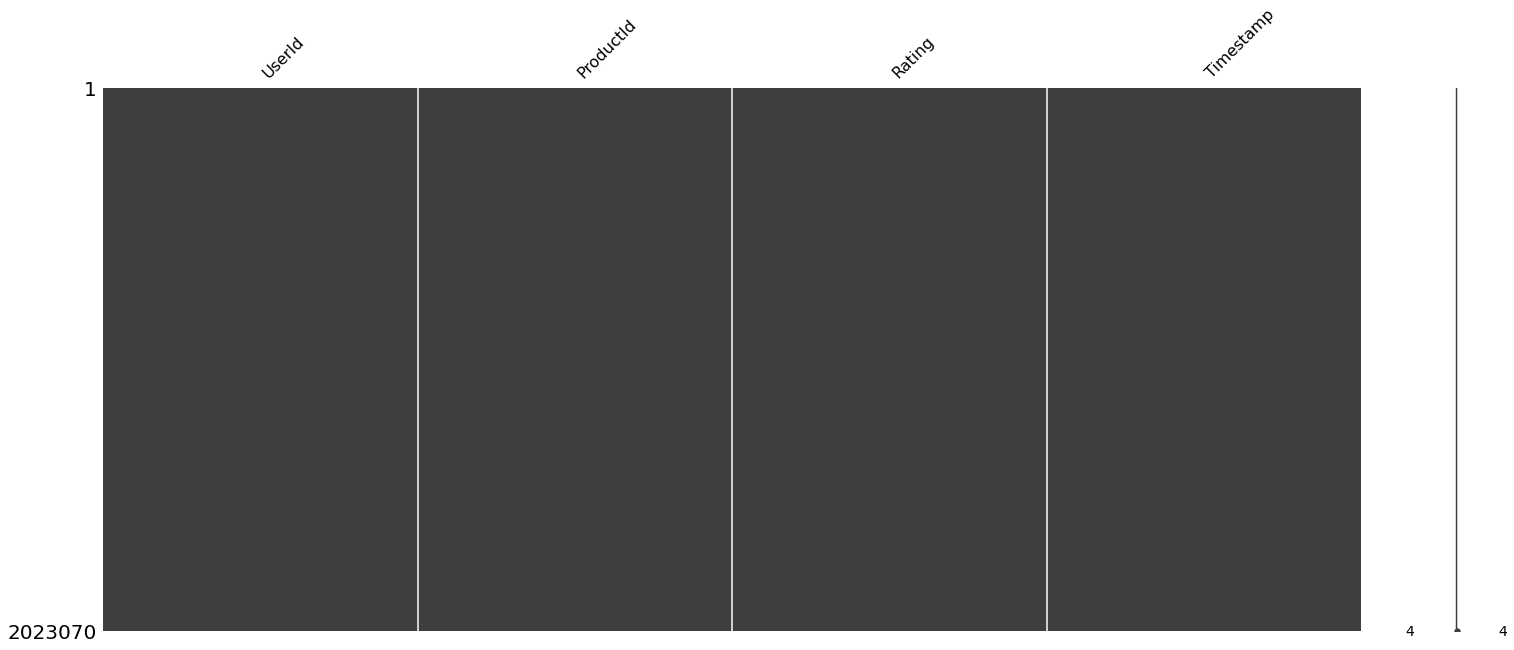

In [70]:
ms.matrix(data)

In [102]:
data.dropna(inplace=True)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
UserId       object
ProductId    object
Rating       float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 77.2+ MB


In [73]:
data.shape

(2023070, 4)

In [74]:
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


## Recommendation - 1 

#### Extracting Most Popular product based on count of sales/ratings

In [75]:
top_products = pd.DataFrame(data.groupby('ProductId')['Rating'].sum())

In [76]:
top_products=top_products.sort_values('Rating',ascending=False)

In [77]:
top_products.head(20)

,Rating
ProductId,
B001MA0QY2,32553.0
B0043OYFKU,10677.0
B0009V1YR8,10239.0
B0000YUXI0,9440.0
B003V265QW,9115.0
B000ZMBSPE,9026.0
B003BQ6QXK,8872.0
B004OHQR1Q,8418.0
B00121UVU0,8341.0


## Recommendation - 2

#### Extracting Most Sold product based on number of users brought a product

In [78]:
most_sold_products = pd.DataFrame(data.groupby('ProductId')['UserId'].count())
most_sold_products = most_sold_products.sort_values('UserId',ascending=False)

In [79]:
most_sold_products.head(20)

,UserId
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


## Recommendation - 3

#### Extracting resommendations for similar users

In [103]:
data.drop('Timestamp',axis=1,inplace=True)

In [104]:
data.head()

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0


In [82]:
##unique users
len(list(set(data['UserId'])))

1210271

In [83]:
##unique products
len(list(set(data['ProductId'])))

249274

In [84]:
##unique ratings
(list(set(data['Rating'])))

[1.0, 2.0, 3.0, 4.0, 5.0]

### Building Collaborative Filtering Model

#### We can do this 2 ways
1. recommending new products to users who brought similar products to each other
2. recommending new products to users who brought similar products and had similar ratings

In [85]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

http://surpriselib.com/

In [86]:
#reader is used to parse ratings column automatically into the suprise dataset
reader = Reader(rating_scale=(1.0, 5.0))

In [87]:
suprise_data = Dataset.load_from_df(data[['UserId', 'ProductId', 'Rating']],reader)

In [88]:
#suprise_data.head()

In [89]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(suprise_data, test_size=.3,random_state=0)

### Model Training

In [90]:
#k (int) – The (max) number of neighbors to take into account for aggregation (see this note). Default is 40.

#min_k (int) – The minimum number of neighbors to take into account for aggregation.
#If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.

#sim_options (dict) – A dictionary of options for the similarity measure.

#docs for suprise recommended to use pearson_baseline .. will study why
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


MemoryError: Unable to allocate 3.12 TiB for an array with shape (926051, 926051) and data type int32

In [91]:
# memory limilation - 8 gb ram is not able to allocate 3.12 Tib memory

In [105]:
data.shape

(2023070, 3)

## Need to filter data
#### keeping users which has more than 50 ratings

In [106]:
userID = data.groupby('UserId').count()

In [136]:
top_users = userID[userID['Rating']>=10].index

In [137]:
temp = data[data['UserId'].isin(top_users)]

In [138]:
temp.shape

(222897, 3)

In [139]:
temp.head()

,UserId,ProductId,Rating
5,AKJHHD5VEH7VG,0762451459,5.0
6,A1BG8QW55XHN6U,1304139212,5.0
7,A22VW0P4VZHDE3,1304139220,5.0
10,A1BG8QW55XHN6U,130414643X,5.0
13,A22VW0P4VZHDE3,130414674X,5.0


#### keeping products which has more than 50 ratings

In [140]:
prodID = data.groupby('ProductId').count()

In [141]:
top_prod = prodID[prodID['Rating'] >= 10].index

In [142]:
temp1 = temp[temp['ProductId'].isin(top_prod)]

In [143]:
temp1.shape

(167452, 3)

### Training Again

In [144]:
reader = Reader(rating_scale=(1.0, 5.0))

In [145]:
suprise_data = Dataset.load_from_df(temp1[['UserId', 'ProductId', 'Rating']],reader)

In [146]:
trainset, testset = train_test_split(suprise_data, test_size=.3,random_state=0)

#### KNN Model

In [147]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


#### SVD

In [149]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

In [150]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

## Model Evaluation

#### KNN Model

In [151]:
# Evalute on test set
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A3LOVYOYGXZEZV', iid='B0014DH6EK', r_ui=5.0, est=5.0, details={'actual_k': 0, 'was_impossible': False})

In [152]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.1399


1.1398589975803508

#### SVD

In [153]:
test_pred = svd_model.test(testset)
accuracy.rmse(test_pred)

RMSE: 1.0966


1.0966420641175703

In [154]:
# RMSE is Root Mean Square Error. Since SVD has less RMSE it is a better model

#### Tuning Parameters

In [301]:
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [302]:
gs.fit(suprise_data)

In [303]:
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.01}}

In [304]:
# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.9511


0.951059458232937

In [179]:
test_pred[:5]

[Prediction(uid='A3LOVYOYGXZEZV', iid='B0014DH6EK', r_ui=5.0, est=4.360993009669652, details={'was_impossible': False}),
 Prediction(uid='A1PN75T7YJYF8B', iid='B004XNPE9C', r_ui=5.0, est=4.433440011328474, details={'was_impossible': False}),
 Prediction(uid='AUVIYV9YLYFXE', iid='B004ABZ1TU', r_ui=4.0, est=3.848667011592347, details={'was_impossible': False}),
 Prediction(uid='A281NPSIMI1C2R', iid='B001UE60E0', r_ui=4.0, est=5.0, details={'was_impossible': False}),
 Prediction(uid='A6QG9LM5WL0AQ', iid='B006L6AA8Y', r_ui=4.0, est=4.518848447209253, details={'was_impossible': False})]

### Testing

In [160]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [161]:
top_n = get_top_n(test_pred, n=5)

In [171]:
testset[testset[0]=='A3LOVYOYGXZEZV']

('A3LOVYOYGXZEZV', 'B0014DH6EK', 5.0)

In [181]:
# Print the recommended items for each user
count=0
for uid, user_ratings in top_n.items():
    if uid=='A3LOVYOYGXZEZV':
        print(uid, [iid for (iid, _) in user_ratings])
    count+=1
    if count == 5:
        break

A3LOVYOYGXZEZV ['B00IMLLW6A', 'B000RZQGS8', 'B0014DH6FE', 'B0014DH6EK']


### recommending products to users who brought similar products to each other

In [183]:
temp1.head()

,UserId,ProductId,Rating
36,A274NIJWOQWE30,1304351475,5.0
198,A13IIHXY0QX4Y4,535795531X,3.0
228,A39GFZUNMWJ44J,5357955948,5.0
347,A60XNB876KYML,7806397051,3.0
349,A3G6XNM240RMWA,7806397051,4.0


In [258]:
no_of_users_brought_the_product = pd.DataFrame(temp1.groupby('ProductId')['UserId'].count().reset_index())
no_of_users_brought_the_product = no_of_users_brought_the_product.sort_values('UserId',ascending=False)

In [261]:
no_of_users_brought_the_product.head()

,ProductId,UserId
17065,B0043OYFKU,241
553,B000142FVW,229
6909,B000ZMBSPE,228
21736,B00639DLV2,206
7750,B00150LT40,198


In [272]:
list(no_of_users_brought_the_product[no_of_users_brought_the_product['ProductId']=='B0043OYFKU']['Count'])[0]

241

In [262]:
no_of_users_brought_the_product.columns=['ProductId','Count']

In [263]:
no_of_users_brought_the_product.shape

(29152, 2)

In [234]:
type(temp1)

pandas.core.frame.DataFrame

In [235]:
temp1.head()

,UserId,ProductId,Rating
36,A274NIJWOQWE30,1304351475,5.0
198,A13IIHXY0QX4Y4,535795531X,3.0
228,A39GFZUNMWJ44J,5357955948,5.0
347,A60XNB876KYML,7806397051,3.0
349,A3G6XNM240RMWA,7806397051,4.0


In [237]:
data_list_user_id = list(temp1['UserId'])
data_list_product_id = list(temp1['ProductId'])

In [273]:
data_list_count = []

In [239]:
len(data_list_user_id)

167452

In [240]:
len(data_list_product_id)

167452

In [274]:
for i in data_list_product_id:
    data_list_count.append(list(no_of_users_brought_the_product[no_of_users_brought_the_product['ProductId']==i]['Count'])[0])

In [275]:
data_list_count[:10]

[1, 1, 1, 4, 4, 4, 4, 1, 3, 3]

In [292]:
max(data_list_count)

241

In [277]:
data_list_user_id[0]

'A274NIJWOQWE30'

In [278]:
data_list_product_id[0]

'1304351475'

In [281]:
no_of_users_brought_the_product[no_of_users_brought_the_product['ProductId']=='1304351475']

,ProductId,Count
0,1304351475,1


In [288]:
df1= pd.DataFrame(data_list_user_id,columns=['UserId'])
df2= pd.DataFrame(data_list_product_id,columns=['ProductId'])
df3= pd.DataFrame(data_list_count,columns=['Count'])

In [289]:
data_with_count = pd.concat([df1,df2,df3],axis=1)

In [290]:
data_with_count.head()

,UserId,ProductId,Count
0,A274NIJWOQWE30,1304351475,1
1,A13IIHXY0QX4Y4,535795531X,1
2,A39GFZUNMWJ44J,5357955948,1
3,A60XNB876KYML,7806397051,4
4,A3G6XNM240RMWA,7806397051,4


#### Training

In [293]:
reader = Reader(rating_scale=(1, 241))

In [294]:
suprise_data = Dataset.load_from_df(data_with_count[['UserId', 'ProductId', 'Count']],reader)

In [295]:
trainset, testset = train_test_split(suprise_data, test_size=.3,random_state=0)

In [296]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [305]:
svd_model_count = SVD(n_factors=5,reg_all=0.01)
svd_model_count.fit(trainset)

In [306]:
# Evalute on test set
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A3LOVYOYGXZEZV', iid='B0014DH6EK', r_ui=3.0, est=7.5, details={'actual_k': 0, 'was_impossible': False})

In [307]:
accuracy.rmse(test_pred)

RMSE: 31.9205


31.92049108625332

In [308]:
test_pred = svd_model_count.test(testset)
accuracy.rmse(test_pred)

RMSE: 7.8677


7.867718028941025

In [309]:
test_pred[:5]

[Prediction(uid='A3LOVYOYGXZEZV', iid='B0014DH6EK', r_ui=3.0, est=5.629965163756719, details={'was_impossible': False}),
 Prediction(uid='A1PN75T7YJYF8B', iid='B004XNPE9C', r_ui=8.0, est=9.396448117095368, details={'was_impossible': False}),
 Prediction(uid='AUVIYV9YLYFXE', iid='B004ABZ1TU', r_ui=6.0, est=5.577309501177311, details={'was_impossible': False}),
 Prediction(uid='A281NPSIMI1C2R', iid='B001UE60E0', r_ui=31.0, est=30.283479159843544, details={'was_impossible': False}),
 Prediction(uid='A6QG9LM5WL0AQ', iid='B006L6AA8Y', r_ui=59.0, est=60.0279238226302, details={'was_impossible': False})]

In [310]:
top_n_count = get_top_n(test_pred, n=5)

In [327]:
testset[testset[0]=='A3LOVYOYGXZEZV']

('A3LOVYOYGXZEZV', 'B0014DH6EK', 3.0)

In [328]:
# Print the recommended items for each user
count=0
for uid, user_ratings in top_n.items():
    if uid=='A3LOVYOYGXZEZV':
        print(uid, [iid for (iid, _) in user_ratings])
    count+=1
    if count == 5:
        break

A3LOVYOYGXZEZV ['B00IMLLW6A', 'B000RZQGS8', 'B0014DH6FE', 'B0014DH6EK']
